<h1>Polynomial Regression</h1>

<h3>This notebook focuses on the creation of a Polynomial Regression Model</h3>

<p>Problem: predict the salary of a new employee based on his assumed position in the previous company</p>

<h3>Preprocessing as described in Part 1 of this course</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataFilePath = '../../data/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv'
dataset = pd.read_csv(dataFilePath)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<h3>Fitting Linear Regression to the dataset (for comparison pourposes)</h3>

In [2]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3>Fitting Polynomial Regression to the dataset</h3>
<p>PolynomialFeatures class will be used to include powers of the original data in the dataset</p>

In [3]:
from sklearn.preprocessing import PolynomialFeatures

polyReg = PolynomialFeatures(degree = 2)
xPoly = polyReg.fit_transform(X)
xPoly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

In [4]:
linReg2 = LinearRegression()
linReg2.fit(xPoly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3>Visualising the Simple Linear Regression results</h3>

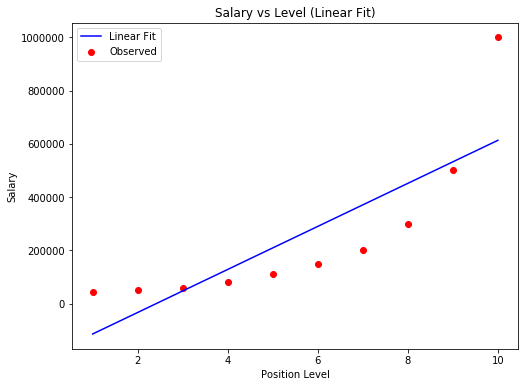

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(X, y, color = 'red', label = 'Observed')
plt.plot(X, linReg.predict(X), color = 'blue', label = 'Linear Fit')
plt.title('Salary vs Level (Linear Fit)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

<h3>Visualising the Polynomial Regression results</h3>

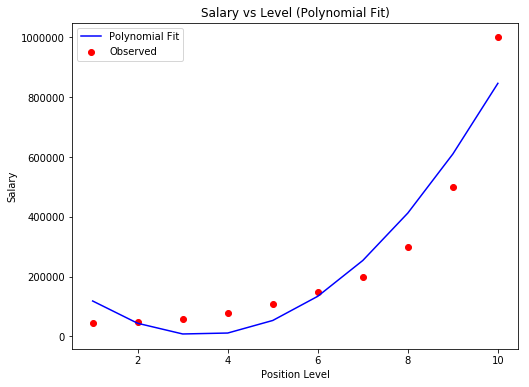

In [15]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(X, y, color = 'red', label = 'Observed')
plt.plot(X, linReg2.predict(polyReg.fit_transform(X)), color = 'blue', label = 'Polynomial Fit')
plt.title('Salary vs Level (Polynomial Fit)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

<h3>Fitting and visualising 3rd degree Polynomial Regression results</h3>

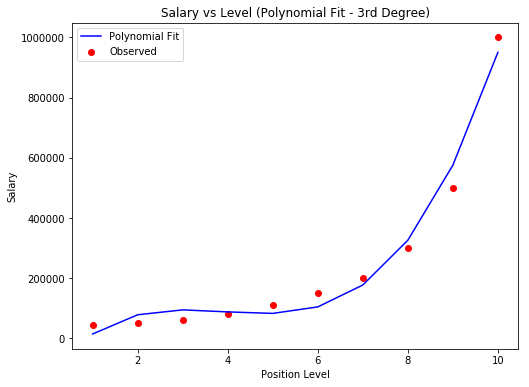

In [20]:
polyReg3 = PolynomialFeatures(degree = 3)
xPoly3 = polyReg3.fit_transform(X)

linReg3 = LinearRegression()
linReg3.fit(xPoly3, y)

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(X, y, color = 'red', label = 'Observed')
plt.plot(X, linReg3.predict(polyReg3.fit_transform(X)), color = 'blue', label = 'Polynomial Fit')
plt.title('Salary vs Level (Polynomial Fit - 3rd Degree)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

<h3>Fitting and visualising 4th degree Polynomial Regression results</h3>

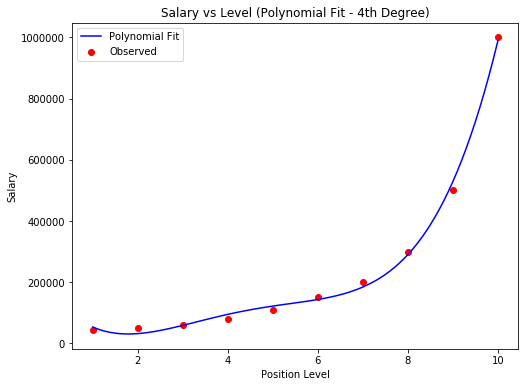

In [24]:
polyReg4 = PolynomialFeatures(degree = 4)
xPoly4 = polyReg4.fit_transform(X)

linReg4 = LinearRegression()
linReg4.fit(xPoly4, y)

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
xGrid = np.arange(min(X), max(X) + 0.1, 0.1)
xGrid = xGrid.reshape((len(xGrid), 1))
plt.scatter(X, y, color = 'red', label = 'Observed')
plt.plot(xGrid, linReg4.predict(polyReg4.fit_transform(xGrid)), color = 'blue', label = 'Polynomial Fit')
plt.title('Salary vs Level (Polynomial Fit - 4th Degree)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

<h3>Predicting the previous salary of the new employee</h3>

In [31]:
print('Predicted salary using Linear Regression: {}'.format(linReg.predict(6.5)[0]))

print('Predicted salary using Polynomianl Regression: {}'.format(linReg4.predict(polyReg4.fit_transform(6.5))[0]))

Predicted salary using Linear Regression: 330378.78787878784
Predicted salary using Polynomianl Regression: 158862.45265154913
